In [1]:
#データを読み込んで利用データを整形
import pandas as pd
customer = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/5章/customer_join.csv')
uselog_months = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/5章/use_log_months.csv')
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [3]:
year_months = list(uselog_months['年月'].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months['年月'] == year_months[i]].copy()
    tmp.rename(columns = {'count' : 'count_0'}, inplace = True)
    tmp_before = uselog_months.loc[uselog_months['年月'] == year_months[i-1]].copy() # year_monthsのリストは0から始まる
    del tmp_before['年月']
    tmp_before.rename(columns = {'count' : 'count_1'}, inplace = True)
    tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how = 'left')
    uselog = pd.concat([uselog, tmp], ignore_index = True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [5]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [7]:
#退会前月の退会顧客データを作成
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer['is_deleted'] == 1].copy() # 退会した人のデータを抽出
exit_customer['exit_date'] = None
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
# 退会した人は退会月の前月に申告しているので、その情報を入れる
for i in exit_customer.index:
    exit_customer.loc[i, 'exit_date'] = exit_customer.loc[i, 'end_date'] - relativedelta(months = 1)
exit_customer['exit_date'] = pd.to_datetime(exit_customer['exit_date'])
exit_customer['年月'] = exit_customer['exit_date'].dt.strftime('%Y%m')
uselog['年月'] = uselog['年月'].astype(str) # exit_customer['年月']にデータの型を揃える
exit_uselog = pd.merge(uselog, exit_customer, on = ['customer_id', '年月'], how = 'left')
print(len(uselog))
exit_uselog.head() # 退会していない人のデータはNaNになる

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [9]:
# customerではend_date以外に欠損値はないのでexit_customerでnameが欠損地になっているデータは上手く結合できていない
exit_uselog = exit_uselog.dropna(subset = ['name']) # subset = ['name']でexit_uselog['name']でNaNの行を削除する
print(len(exit_uselog))
print(len(exit_uselog['customer_id'].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [11]:
# 継続顧客のデータを作成
conti_customer = customer.loc[customer['is_deleted'] == 0] # 継続顧客のデータを抽出
conti_uselog = pd.merge(uselog, conti_customer, on = ['customer_id'], how = 'left')
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset = ['name']) # conti_uselog['name']でNaNになっている行を削除する
print(len(conti_uselog))

33851
27422


In [13]:
conti_uselog = conti_uselog.sample(frac = 1, random_state = 0).reset_index(drop = True)
conti_uselog = conti_uselog.drop_duplicates(subset = 'customer_id')
print(len(conti_uselog))
conti_uselog.head()

'''
sample(frac = 1) 全てのデータをランダムに並び替える
reset_index(drop = True) インデックスは削除され残らない
drop_deplicates() 重複した値を削除
'''

2842


'\nsample(frac = 1) 全てのデータをランダムに並び替える\nreset_index(drop = True) インデックスは削除され残らない\ndrop_deplicates() 重複した値を削除\n'

In [15]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index = True) # conti_uselogとexit_uselogを縦方向に結合
print(len(predict_data))
predict_data.head()

3946


/var/folders/2n/k04q38yx087g0pz_q6w7gfd40000gn/T/ipykernel_7424/2494552856.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index = True) # conti_uselogとexit_uselogを縦方向に結合


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT


In [17]:
# 予測する月の在籍期間を作成
predict_data['period'] = 0  # period列を作成
predict_data['now_date'] = pd.to_datetime(predict_data['年月'], format = '%Y%m') # year, monthにデータの型を変換
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i, 'now_date'], predict_data.loc[i, 'start_date']) # now_date - start_dateで在籍期間を作成
    predict_data.loc[i, 'period'] = int(delta.years * 12 + delta.months) # 在籍期間を月単位で表示
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT,8,2018-05-01


In [19]:
# 欠損値を除去する
predict_data.isnull().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [21]:
predict_data = predict_data.dropna(subset = ['count_1'])  # count_1に欠損値が入っているデータを削除する(今月入会した人)
predict_data.isnull().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [23]:
# 文字列方の変数を処理できるように整形する
target_col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[target_col]
predict_data.head()

'''
説明変数 'campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period'
応答変数　'is_deleted'
'''

"\n説明変数 'campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period'\n応答変数\u3000'is_deleted'\n"

In [25]:
predict_data = pd.get_dummies(predict_data, dtype = int) # ダミー変数の作成　dtype = intにしないとT/Fで表示されてしまう
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,1,0,0,1,0,0,0,1
1,5.0,1.0,9,0.0,0,0,1,1,0,0,0,1
2,4.0,1.0,15,0.0,0,0,1,1,0,0,0,1
3,6.0,1.0,3,0.0,0,0,1,0,0,1,0,1
4,7.0,1.0,8,0.0,0,0,1,1,0,0,0,1


In [27]:
del predict_data['campaign_name_通常'] # campaign_nameの二つの列が共に０なら必然的に通常は1になるのでわざわざ残す必要はない
del predict_data['class_name_ナイト']
del predict_data['gender_M']
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,0,0.0,1,0,1,0,0
1,5.0,1.0,9,0.0,0,0,1,0,0
2,4.0,1.0,15,0.0,0,0,1,0,0
3,6.0,1.0,3,0.0,0,0,0,0,0
4,7.0,1.0,8,0.0,0,0,1,0,0


In [29]:
# 決定木を用いて退会予測モデルを作成
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

exit = predict_data.loc[predict_data['is_deleted'] == 1]
conti = predict_data.loc[predict_data['is_deleted'] == 0].sample(len(exit), random_state = 0) # contiの方がデータ数が多いのでexitにデータ数を揃える
X = pd.concat([exit, conti], ignore_index = True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.

In [30]:
result_test = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_test_pred}) # テストデータの実測値とモデルの予測値をデータフレームに格納
result_test.head()

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0


In [33]:
# 予測モデルの評価を行い、モデルのチューニングをする
# 原初的な方法
correct = len(result_test.loc[result_test['y_test'] == result_test['y_pred']])
data_count = len(result_test)
score_test = correct / data_count
print(score_test)

0.8916349809885932


In [35]:
print(model.score(X_test, y_test))  # テストデータに対する正答率
print(model.score(X_train, y_train))  # モデル学習時の正答率

'''
学習用データの精度が高すぎるので過学習になっている
→ 決定木の深さを浅くすることでシンプルな構造になり過学習を防ぐことができる
'''

0.8916349809885932
0.9759188846641318


'\n学習用データの精度が高すぎるので過学習になっている\n→ 決定木の深さを浅くすることでシンプルな構造になり過学習を防ぐことができる\n'

In [37]:
X = pd.concat([exit, conti], ignore_index = True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = DecisionTreeClassifier(max_depth = 5, random_state = 0) # 決定木の深さを指定
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9201520912547528
0.9252217997465145


In [39]:
# モデルに寄与している変数を確認する
importance = pd.DataFrame({'feature_names' : X.columns, 'coefficient' : model.feature_importances_})
importance # feature_importances_ 係数を抽出、第４章の回帰では coef_で抽出した

,feature_names,coefficient
0,count_1,0.363986
1,routine_flg,0.136646
2,period,0.487865
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.006751
5,class_name_オールタイム,0.004607
6,class_name_デイタイム,0.000146
7,gender_F,0.000000


[Text(0.5643939393939394, 0.9166666666666666, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792.0, 786.0]'),
 Text(0.26515151515151514, 0.75, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.4147727272727273, 0.8333333333333333, 'True  '),
 Text(0.12121212121212122, 0.5833333333333334, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.06060606060606061, 0.4166666666666667, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.25, 'count_1 <= 3.5\ngini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.06060606060606061, 0.08333333333333333, 'gini = 0.0\nsamples = 359\nvalue = [0, 359]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.043\nsamples = 136\nvalue = [3, 133]'),
 Text(0.18181818181818182, 0.4166666666666667, 'routine_flg <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.151

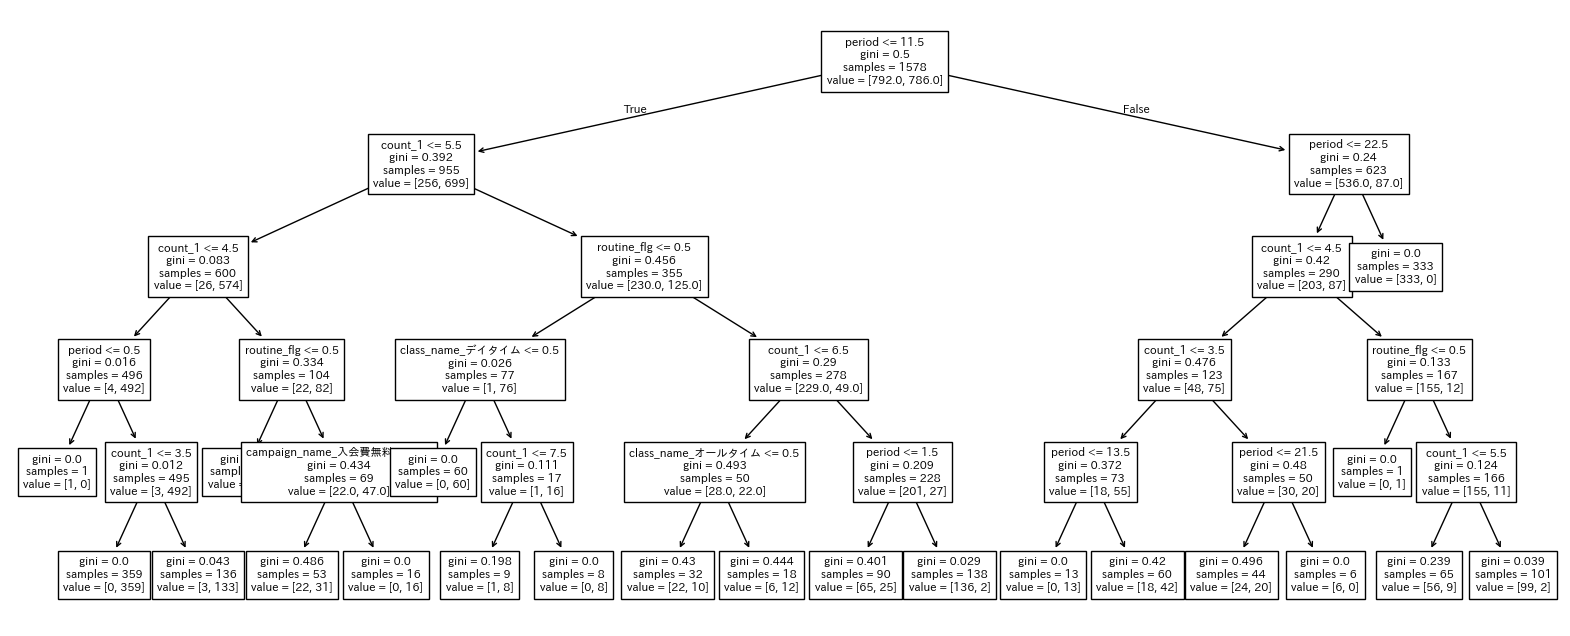

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize = (20, 8))
tree.plot_tree(model, feature_names = X.columns, fontsize = 8)

In [43]:
# 顧客の退会を予測する
count_1 = 3
routine_flg = 1
period = 10
campaign_name = '入会費無料'
class_name = 'オールタイム'
gender = 'M'

In [59]:
if campaign_name == '入会費半額':
    campaign_name_list = [1, 0]
elif campaign_name == '入会費無料':
    campaign_name_list = [0, 1]
elif campaign_name == '通常':
    campaign_name_list = [0, 0]

if class_name == '通常':
    class_name_list = [0, 0]
elif class_name == 'オールタイム':
    class_name_list = [1, 0]
elif class_name == 'デイタイム':
    class_name_list = [0, 1]
elif class_name == 'オールタイム':
    class_name_list = [1, 1]

if gender == 'F':
    gender_name_list = [1]
elif gender == 'M':
    gender_name_list = [0]

input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_name_list)
input_data = pd.DataFrame(data = [input_data], columns = X.columns)

In [61]:
print(model.predict(input_data))
print(model.predict_proba(input_data))

[1.]
[[0. 1.]]
